# Determination of pBleach
### Johanna Rahm, Sebastian Malkusch
#### Research group Heilemann
#### Institute for Physical and Theoretical Chemistry, Goethe University Frankfurt a.M.

## Load file

Insert the full file name & direcory path of the tracked seg file with .txt ending or browse for it. (Example path: F:\Marburg\single_colour_tracking\resting\160404_CS5_Cell1\cell_1_MMStack_Pos0.ome.tif.tracked.seg.txt)

In [1]:
from pySPT.widgets import widgetDirectoryStructure
from pySPT.widgets import widgetPBleach
from pySPT.preAnalysis import pBleach
widget_p_bleach = widgetPBleach.WidgetPBleach()
p_bleach = pBleach.PBleach()
widget_dir_structure = widgetDirectoryStructure.WidgetDirStructure()
display(widget_p_bleach.file_text_box, widget_p_bleach.file_button)
widget_p_bleach.file_button.on_click(widget_p_bleach.open_file)

Text(value='path', description='Complete path', placeholder='Type something', style=DescriptionStyle(descripti…

Button(description='browse', style=ButtonStyle(), tooltip='browse for file')

## Run Analysis

Insert an inital k value for the exponential fit (k·exp(-k·t)).

In [2]:
widget_dir_structure.name_handling(widget_p_bleach.file_name)
widget_dir_structure.create_raw_base_name()
display(widget_p_bleach.init_k)

Text(value='0.01', description='Initial k', placeholder='Type something', style=DescriptionStyle(description_w…

Analysis will yield k, its variance for the fit kv and a p_bleach value.

0.01
Results: p_bleach = 0.381, k = 4.7991e-01, kv = 5.1973e-05


C:\Users\pcoffice37\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


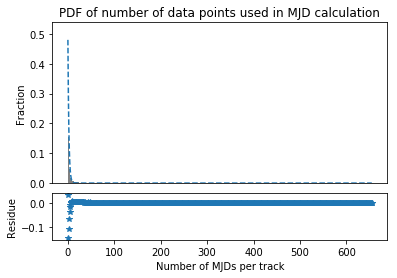

In [3]:
display(widget_p_bleach.run_button)
def run_analysis(event):
    widget_p_bleach.create_clear_output()
    if widget_p_bleach.got_file_name:
        p_bleach.load_seg_file(widget_p_bleach.file_text_box.value)
        p_bleach.count_mjd_n_frequencies()
        print(widget_p_bleach.init_k.value)
        p_bleach.calc_k_bleach(widget_p_bleach.init_k.value)
        p_bleach.calc_decay()
        p_bleach.plot_mjd_frequencies()
widget_p_bleach.run_button.on_click(run_analysis)

## Save results

The results will be saved in a .txt file with columns: mjd_n, fraction, exponential fit, residues.

In [4]:
display(widget_p_bleach.save_button)
def save_analysis(event):
    widget_p_bleach.clear_output
    widget_dir_structure.name_handling(widget_p_bleach.file_name)
    widget_dir_structure.create_folder()
    p_bleach.save_fit_results(widget_dir_structure.pre_analysis_dir, widget_dir_structure.raw_base_name)
    p_bleach.save_mjd_n_frequencies(widget_dir_structure.pre_analysis_dir, widget_dir_structure.raw_base_name)
widget_p_bleach.save_button.on_click(save_analysis)

Button(description='save', style=ButtonStyle(), tooltip='save the results')